In [1]:
import pandas as pd
import numpy as np

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [14]:


### Ваш код ###
from sklearn.model_selection import train_test_split
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into 70/30 training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [6]:


### Ваш код ###

acc_DT = 0
acc_Bagging = 0
acc_RF = 0

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)

acc_DT = accuracy_score(y_test, dt_preds)

bc = BaggingClassifier(n_estimators=100)
bc.fit(X_train, y_train)

bc_preds = bc.predict(X_test)

acc_Bagging = accuracy_score(y_test, bc_preds)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

# Evaluate accuracy
acc_RF = accuracy_score(y_test, rf_preds)

results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.562500
1,BaggingClassifier,task2,0.647917
2,RandomForestClassifier,task2,0.668750


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



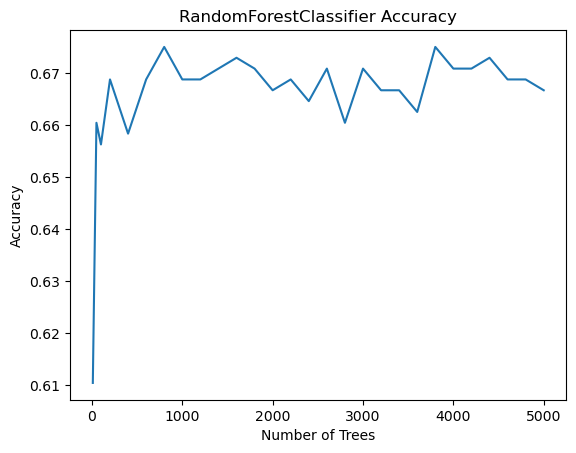

In [10]:


### Ваш код ###
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_trees = [10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000]
accuracies = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    accuracies.append(rf_accuracy)

plt.plot(n_trees, accuracies)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("RandomForestClassifier Accuracy")
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [19]:


### Ваш код ###

acc_sklearn = 0
acc_xgboost = 0

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
acc_sklearn = cross_val_score(gb, X_test, y_test, cv=5, scoring="accuracy").mean()

xgb_model = xgb.XGBClassifier()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

xgb_model.fit(X_train, y_train)
acc_xgboost = cross_val_score(xgb_model, X_test, y_test, cv=5, scoring="accuracy").mean()

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]
results

c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 68

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.562500
1,BaggingClassifier,task2,0.647917
2,RandomForestClassifier,task2,0.668750
3,GradientBoostingClassifier,task4,0.564583
4,XGBClassifier,task4,NaN


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [ ]:


### Ваш код ###

best_params_sklearn = {}
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
best_params_xgboost = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
acc_sklearn_cv = 0
acc_xgboost_cv = 0
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [ ]:


### Ваш код ###

acc_lightgbm = 0
acc_catboost = 0
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [ ]:


### Ваш код ###

best_params_lightgbm = {}
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = {}
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = 0
acc_catboost_cv = 0
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:


### Ваш код ###

best_params_xgboost_optuna = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = 0
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:


### Ваш код ###

acc_stacking_default = 0
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:


### Ваш код ###

acc_stacking = 0
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [ ]:
results